
### 미션: Animal Rescue Drone - 동물 구조 드론 AI

🐾 **배경 스토리:**

2025년, 환경 파괴와 기후 변화로 인해 많은 야생 동물들이 서식지를 잃고 도심 지역으로 유입되고 있습니다.
이로 인해 구조 요청이 급증하고 있으며, 이를 해결하기 위해 **Animal Rescue Drone** 팀이 결성되었습니다.
당신은 드론에 탑재될 이미지 인식 모델을 개발하는 AI 엔지니어로 임명되었습니다.

당신의 임무는 **CNN 기반의 이미지 분류기**를 설계하여 드론이 도심에서 발견한 동물들을 빠르게 인식하고,
구조 요청이 필요한 동물들을 식별할 수 있도록 하는 것입니다.

---

🛠️ **미션 요구사항:**

1. **데이터셋 준비:**
   - **Caltech101** 데이터셋을 사용하여 고해상도 이미지를 활용합니다.
   - 동물 클래스: '고양이', '개', '새', '말', '사슴'
   - 비동물 클래스: '자동차', '비행기', '배', '트럭', '자전거'

   -또는 CIFAR-10 데이터셋을 사용하여 동물과 비동물(자동차, 비행기 등)을 분류합니다.

**Caltech101** 데이터셋 수동 다운로드 방법(URL이 변경되어 torchvision.dataset에서 자동 다운로드 안되며 아래 절차로 수동 다운로드 가능)

https://data.caltech.edu/records/mzrjq-6wc02
수동 다운로드를 진행하려면 다음 단계를 따르세요:

데이터 파일 다운로드
Caltech101 데이터셋은 두 개의 파일이 필요합니다.
이미지 파일: 101_ObjectCategories.tar.gz
어노테이션 파일: Annotations.tar
위 링크를 웹 브라우저에서 열어 파일을 다운로드합니다.
다운로드한 파일 저장 및 압축 해제

다운로드한 파일들을 예를 들어 ./data 폴더에 저장합니다.
터미널에서 아래와 같이 압축을 해제할 수 있습니다:

cd ./data
tar -xzvf 101_ObjectCategories.tar.gz
tar -xvf Annotations.tar

코드 수정
데이터셋 로드 시 download=True 대신 download=False로 설정하여, 이미 다운로드한 파일을 사용하도록 합니다.

   caltech_data = Caltech101(root='./data', download=False, transform=transform)
이렇게 수정하면 수동으로 다운로드한 데이터를 사용하여 모델을 학습할 수 있습니다.


2. **모델 설계:**
   - 기본적인 CNN 모델을 설계하고 학습시킵니다.
   - ResNet50 또는 VGG16의 **pretrained model**을 활용하여 Transfer Learning을 수행합니다.
   - 최종 출력층은 2개의 클래스(동물 vs 비동물)로 조정합니다.

3. **Fine Tuning:**
   - Transfer Learning에서 최종 Layer를 학습 가능한 상태로 두고, 일부 Layer는 고정합니다.
   - 5 Epoch 동안 Fine Tuning을 수행합니다.

4. **CNN 시각화:**
   - **Filter Visualization:** Conv Layer의 필터를 시각화합니다.
   - **Feature Map Visualization:** 특정 이미지가 Conv Layer를 통과하면서 얻어진 Feature Map을 시각화합니다.
   - **Grad-CAM**을 활용하여 모델이 주목한 영역을 시각화합니다.

**추가 보너스 미션:**
   - 새로운 데이터셋(예: Tiny ImageNet)을 활용하여 Transfer Learning 모델의 성능을 비교합니다.



In [18]:
# 압축 해제 경로로 이동
%cd "/content/data"

# 압축해제
!tar -xzvf 101_ObjectCategories.tar.gz
!tar -xvf Annotations.tar

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
Annotations/chair/annotation_0002.mat
Annotations/chair/annotation_0003.mat
Annotations/chair/annotation_0004.mat
Annotations/chair/annotation_0005.mat
Annotations/chair/annotation_0006.mat
Annotations/chair/annotation_0007.mat
Annotations/chair/annotation_0008.mat
Annotations/chair/annotation_0009.mat
Annotations/chair/annotation_0010.mat
Annotations/chair/annotation_0011.mat
Annotations/chair/annotation_0012.mat
Annotations/chair/annotation_0013.mat
Annotations/chair/annotation_0014.mat
Annotations/chair/annotation_0015.mat
Annotations/chair/annotation_0016.mat
Annotations/chair/annotation_0017.mat
Annotations/chair/annotation_0018.mat
Annotations/chair/annotation_0019.mat
Annotations/chair/annotation_0020.mat
Annotations/chair/annotation_0021.mat
Annotations/chair/annotation_0022.mat
Annotations/chair/annotation_0023.mat
Annotations/chair/annotation_0024.mat
Annotations/chair/annotation_0025.mat
Annotations/chair/annotation_0026.mat
Annotations/ch

In [1]:
import os

# 데이터셋 폴더 경로 설정
dataset_path = '/content/data/101_ObjectCategories'

# 폴더 목록 출력
print("실제 폴더 목록:")
print(os.listdir(dataset_path))

실제 폴더 목록:
['rooster', 'watch', 'laptop', 'lobster', 'crab', 'bass', 'anchor', 'headphone', 'umbrella', 'stop_sign', 'menorah', 'garfield', 'octopus', 'flamingo', 'okapi', 'emu', 'chair', 'ant', 'wrench', 'yin_yang', 'flamingo_head', 'wheelchair', 'platypus', 'chandelier', 'BACKGROUND_Google', 'mandolin', 'buddha', 'sea_horse', 'panda', 'hedgehog', 'cellphone', 'ceiling_fan', 'tick', 'cougar_body', 'gerenuk', 'Faces_easy', 'gramophone', 'cannon', 'sunflower', 'lotus', 'airplanes', 'stegosaurus', 'electric_guitar', 'pagoda', 'strawberry', 'helicopter', 'mayfly', 'dollar_bill', 'trilobite', 'crocodile', 'pyramid', 'hawksbill', 'dragonfly', 'crocodile_head', 'barrel', 'dalmatian', 'stapler', 'pigeon', 'bonsai', 'brain', 'cup', 'snoopy', 'metronome', 'wild_cat', 'starfish', 'llama', 'water_lilly', 'kangaroo', 'windsor_chair', 'ewer', 'rhino', 'minaret', 'elephant', 'Faces', 'soccer_ball', 'pizza', 'dolphin', 'lamp', 'euphonium', 'cougar_face', 'saxophone', 'brontosaurus', 'schooner', 'sciss

In [2]:
import os
import torch
import torchvision
import torch.nn as nn
import torch.optim as optim
from torchvision import transforms, models
from torch.utils.data import Dataset, DataLoader, random_split
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

# 1. 데이터 준비
class CustomCaltechBinary(Dataset):
    def __init__(self, root, animal_classes, non_animal_classes, transform=None):
        # 데이터 디렉토리 확인: '101_ObjectCategories' 하위에 있는지 체크
        if os.path.isdir(os.path.join(root, '101_ObjectCategories')):
            self.root = os.path.join(root, '101_ObjectCategories')
        else:
            self.root = root
        self.transform = transform
        self.samples = []  # list of (path, label)

        # animal -> label 1
        for class_name in animal_classes:
            class_dir = os.path.join(self.root, class_name)
            if not os.path.isdir(class_dir):
                print(f"Warning: Animal class not found: {class_name}")
                continue
            for fname in os.listdir(class_dir):
                if fname.lower().endswith(('.jpg', '.png', '.jpeg')):
                    self.samples.append((os.path.join(class_dir, fname), 1))
        # non-animal -> label 0
        for class_name in non_animal_classes:
            class_dir = os.path.join(self.root, class_name)
            if not os.path.isdir(class_dir):
                print(f"Warning: Non-animal class not found: {class_name}")
                continue
            for fname in os.listdir(class_dir):
                if fname.lower().endswith(('.jpg', '.png', '.jpeg')):
                    self.samples.append((os.path.join(class_dir, fname), 0))

        if len(self.samples) == 0:
            raise RuntimeError("No images found. Check paths and classes.")

    def __len__(self):
        return len(self.samples)

    def __getitem__(self, idx):
        path, label = self.samples[idx]
        image = Image.open(path).convert('RGB')
        if self.transform:
            image = self.transform(image)
        return image, torch.tensor(label, dtype=torch.long)

# 데이터 변환 정의
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

# 클래스 리스트
animal_classes = [
    'Faces', 'Faces_easy', 'Leopards', 'ant', 'bass', 'beaver', 'butterfly',
    'cougar_body', 'cougar_face', 'crab', 'crayfish', 'crocodile',
    'crocodile_head', 'dalmatian', 'dolphin', 'dragonfly', 'elephant', 'emu',
    'flamingo', 'flamingo_head', 'garfield', 'gerenuk', 'hawksbill',
    'hedgehog', 'ibis', 'kangaroo', 'llama', 'lobster', 'mayfly', 'nautilus',
    'octopus', 'okapi', 'panda', 'pigeon', 'platypus', 'rhino', 'rooster',
    'scorpion', 'sea_horse', 'snoopy', 'starfish', 'stegosaurus', 'tick',
    'trilobite', 'wild_cat'
]


non_animal_classes = [
    'BACKGROUND_Google', 'Motorbikes', 'accordion', 'airplanes', 'anchor',
    'barrel', 'binocular', 'bonsai', 'brain', 'buddha', 'camera', 'cannon',
    'car_side', 'ceiling_fan', 'cellphone', 'chair', 'chandelier', 'cup',
    'dollar_bill', 'electric_guitar', 'euphonium', 'ewer', 'ferry',
    'gramophone', 'grand_piano', 'headphone', 'helicopter', 'inline_skate',
    'joshua_tree', 'ketch', 'lamp', 'laptop', 'lotus', 'mandolin', 'menorah',
    'metronome', 'minaret', 'pagoda', 'pizza', 'pyramid', 'revolver',
    'saxophone', 'schooner', 'scissors', 'soccer_ball', 'stapler', 'stop_sign',
    'strawberry', 'sunflower', 'umbrella', 'watch', 'water_lilly',
    'wheelchair', 'windsor_chair', 'wrench', 'yin_yang'
]


dataset = CustomCaltechBinary(
    root='/content/data/101_ObjectCategories',
    animal_classes=animal_classes,
    non_animal_classes=non_animal_classes,
    transform=transform
)

train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size
train_ds, val_ds = random_split(dataset, [train_size, val_size])
train_loader = DataLoader(train_ds, batch_size=32, shuffle=True)
val_loader = DataLoader(val_ds, batch_size=32)

print(f"Total samples: {len(dataset)}, Train: {len(train_ds)}, Val: {len(val_ds)}")

Total samples: 9101, Train: 7280, Val: 1821


In [4]:
import torch
import torch.nn as nn
import torchvision.models as models

# 1. GPU 장치 설정
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print("CUDA 사용 가능:", torch.cuda.is_available())
print("GPU 장치 수:", torch.cuda.device_count())

# 2. 모델 정의 및 전이 학습
# 최신 버전의 torchvision에 맞게 weights 파라미터 사용
model = models.resnet50(weights=models.ResNet50_Weights.IMAGENET1K_V1)

# freeze all layers
for p in model.parameters():
    p.requires_grad = False

# replace FC
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 2)

# fine-tune FC
for p in model.fc.parameters():
    p.requires_grad = True

# 모델을 장치로 이동
model = model.float().to(device)

# 모델 구조 확인
print(model)

CUDA 사용 가능: True
GPU 장치 수: 1
ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, ke

In [8]:
def train_model(model, train_loader, val_loader):
    criterion = nn.CrossEntropyLoss()

    # 모델의 학습 가능한 파라미터만 최적화
    optimizer = optim.Adam(filter(lambda p: p.requires_grad, model.parameters()), lr=0.001)

    num_epochs = 5
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model.to(device)

    for epoch in range(num_epochs):
        model.train()
        train_loss = 0.0
        correct = 0
        total = 0

        for inputs, labels in train_loader:
            # 데이터 타입 및 디바이스 확인
            inputs = inputs.to(device, dtype=torch.float32)
            labels = labels.to(device, dtype=torch.long)

            # 입력 데이터 차원 확인
            print("Input shape:", inputs.shape)
            print("Labels shape:", labels.shape)

            # 배치 차원 및 채널 차원 확인
            if len(inputs.shape) == 3:
                # 단일 채널 이미지의 경우 채널 차원 추가
                inputs = inputs.unsqueeze(1)
            elif len(inputs.shape) == 4:
                # RGB 이미지의 경우 채널 수 확인
                if inputs.shape[1] != 3:
                    # 채널 차원 재배치
                    inputs = inputs.permute(0, 3, 1, 2)

            optimizer.zero_grad()

            # 모델 출력 및 손실 계산
            outputs = model(inputs)
            loss = criterion(outputs, labels)

            loss.backward()
            optimizer.step()

            train_loss += loss.item()

            # 정확도 계산
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        # 에폭별 손실 및 정확도 출력
        epoch_loss = train_loss / len(train_loader)
        accuracy = 100 * correct / total
        print(f'Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss:.4f}, Accuracy: {accuracy:.2f}%')

    return model

# 모델 학습 실행
trained_model = train_model(model, train_loader, val_loader)

Input shape: torch.Size([32, 3, 224, 224])
Labels shape: torch.Size([32])
Input shape: torch.Size([32, 3, 224, 224])
Labels shape: torch.Size([32])
Input shape: torch.Size([32, 3, 224, 224])
Labels shape: torch.Size([32])
Input shape: torch.Size([32, 3, 224, 224])
Labels shape: torch.Size([32])
Input shape: torch.Size([32, 3, 224, 224])
Labels shape: torch.Size([32])
Input shape: torch.Size([32, 3, 224, 224])
Labels shape: torch.Size([32])
Input shape: torch.Size([32, 3, 224, 224])
Labels shape: torch.Size([32])
Input shape: torch.Size([32, 3, 224, 224])
Labels shape: torch.Size([32])
Input shape: torch.Size([32, 3, 224, 224])
Labels shape: torch.Size([32])
Input shape: torch.Size([32, 3, 224, 224])
Labels shape: torch.Size([32])
Input shape: torch.Size([32, 3, 224, 224])
Labels shape: torch.Size([32])
Input shape: torch.Size([32, 3, 224, 224])
Labels shape: torch.Size([32])
Input shape: torch.Size([32, 3, 224, 224])
Labels shape: torch.Size([32])
Input shape: torch.Size([32, 3, 224, 2

== Conv1 Filters ==


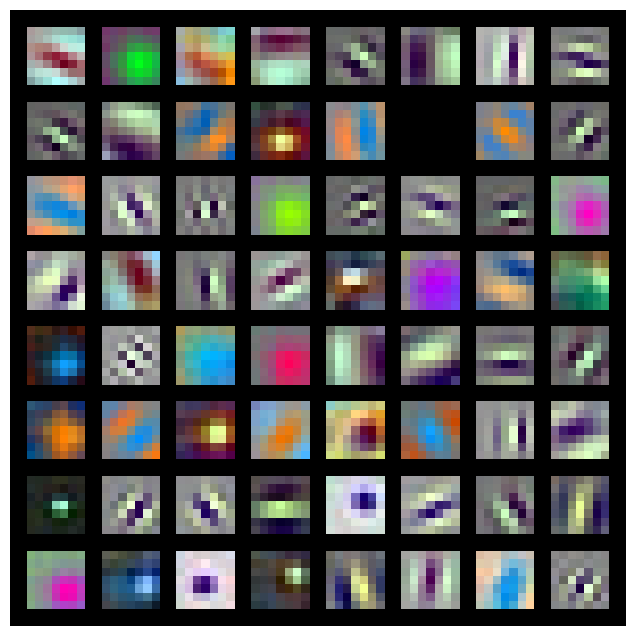

In [9]:
# --- 1. Filter Visualization (첫 번째 Conv layer) ---
import torchvision.utils as vutils

def visualize_filters(layer, n_cols=8):
    w = layer.weight.data.clone().cpu()               # (out_ch, in_ch, k, k)
    grid = vutils.make_grid(w, nrow=n_cols, normalize=True, scale_each=True)
    plt.figure(figsize=(n_cols, w.shape[0]//n_cols))
    plt.imshow(grid.permute(1, 2, 0))
    plt.axis('off')

print("== Conv1 Filters ==")
visualize_filters(trained_model.conv1)
plt.show()


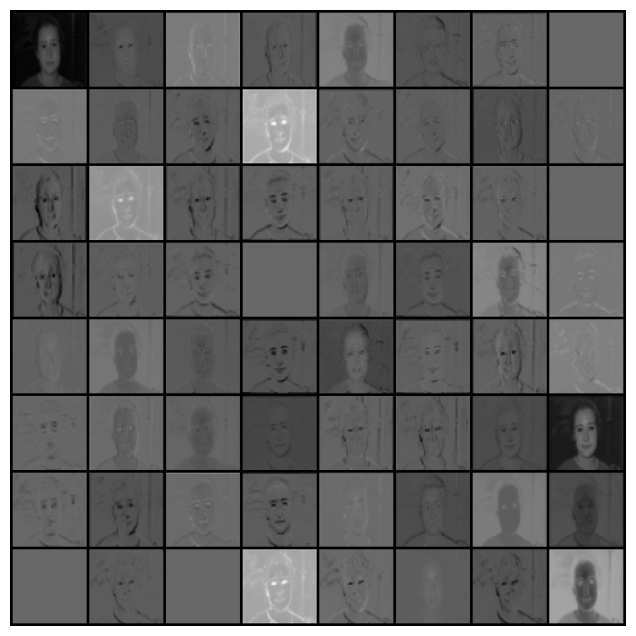

In [17]:
# --- 2. Feature Map Visualization (예: layer1[0].conv1) ---
activation = {}
def hook_fn(module, inp, out):
    activation['feat'] = out.detach().cpu()

# 훅 등록
hook = trained_model.layer1[0].conv1.register_forward_hook(hook_fn)

# 검증 데이터셋에서 한 장 가져오기
img, _ = val_ds[0]
x = img.unsqueeze(0).to(device)

trained_model.eval()
with torch.no_grad():
    _ = trained_model(x)

hook.remove()
fmap = activation['feat'][0]                          # (C, H, W)
grid = vutils.make_grid(fmap.unsqueeze(1), nrow=8, normalize=True)
plt.figure(figsize=(8, fmap.shape[0]//8))
plt.imshow(grid.permute(1, 2, 0))
plt.axis('off')
plt.show()


In [33]:
import torch
import torch.nn.functional as F

def grad_cam(input_tensor, target_layer, cls=None):
    trained_model.eval()

    acts, grads = [], []
    def forward_hook(module, input, output):
        acts.append(output.detach().cpu())
    def backward_hook(module, grad_input, grad_output):
        grads.append(grad_output[0].detach().cpu())

    fh = target_layer.register_forward_hook(forward_hook)
    bh = target_layer.register_full_backward_hook(backward_hook)

    input_tensor.requires_grad_(True)
    out = trained_model(input_tensor)

    if cls is None:
        cls = out.argmax(dim=1).item()

    one_hot = torch.zeros_like(out)
    one_hot[0, cls] = 1
    loss = (one_hot * out).sum()

    trained_model.zero_grad()
    loss.backward()

    fh.remove()
    bh.remove()

    if not acts or not grads:
        print("No activations or gradients captured")
        return None

    act  = acts[0]   # (B, C, H, W)
    grad = grads[0]  # (B, C, H, W)

    weights = grad.mean(dim=(2,3), keepdim=True)  # (B, C, 1, 1)
    cam     = torch.relu((weights * act).sum(dim=1))  # (B, H, W)
    cam     = (cam - cam.min()) / (cam.max() - cam.min())

    # --- 여기부터 들여쓰기 확인 ---
    cam_resized = F.interpolate(
        cam.unsqueeze(1),
        size=(input_tensor.shape[2], input_tensor.shape[3]),
        mode='bilinear',
        align_corners=False
    )               # (B, 1, H, W)
    cam_resized = cam_resized.squeeze(1)           # (B, H, W)
    cam_np      = cam_resized[0].cpu().numpy()     # (H, W)
    return cam_np


Mask shape: (224, 224)
Mask type: <class 'numpy.ndarray'>
Mask dtype: float32


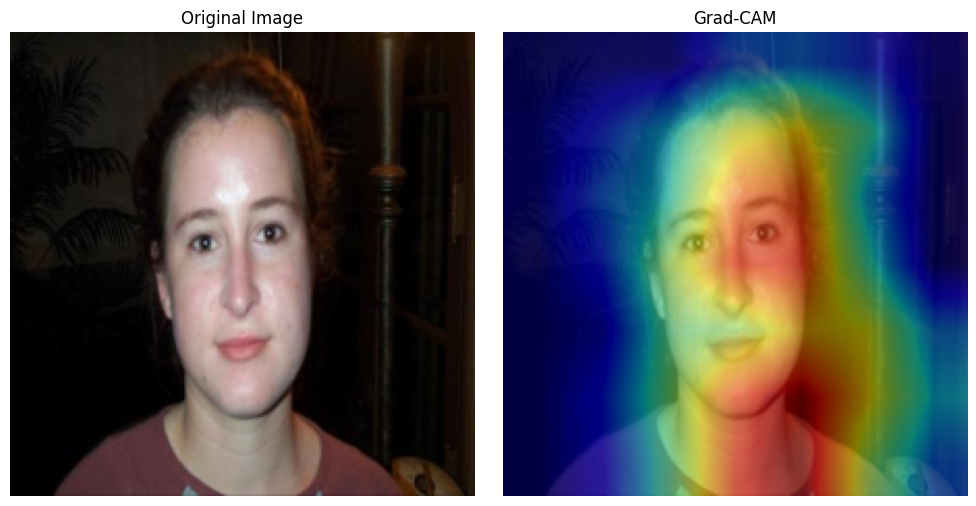

In [34]:

# 시각화 코드
import matplotlib.pyplot as plt
import numpy as np
import torch.nn.functional as F

# 이미지 준비
img, _ = val_ds[0]
x = img.unsqueeze(0).to(device)

# Grad-CAM 마스크 생성
# 주의: ResNet의 경우 보통 layer4의 마지막 컨볼루션 레이어 사용
mask = grad_cam(x, trained_model.layer4[-1])

# 디버깅: mask의 형태 출력
print("Mask shape:", mask.shape)
print("Mask type:", type(mask))
print("Mask dtype:", mask.dtype)

# 마스크 생성 실패 시 처리
if mask is None:
    print("Grad-CAM 마스크 생성 실패")
else:
    # 원본 이미지 복원
    np_img = img.permute(1,2,0).cpu().numpy()
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    np_img = (np_img * std) + mean
    np_img = np.clip(np_img, 0, 1)

    # 시각화
    plt.figure(figsize=(10,5))
    plt.subplot(121)
    plt.imshow(np_img)
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(122)
    plt.imshow(np_img)

    # 마스크 리사이징
    mask_resized = mask.reshape(img.shape[1], img.shape[2])
    plt.imshow(mask_resized, cmap='jet', alpha=0.5)
    plt.title('Grad-CAM')
    plt.axis('off')

    plt.tight_layout()
    plt.show()